In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from wordcloud import WordCloud


In [2]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%204/twitter_training.csv"
df = pd.read_csv(url)
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']
print(df.head())  # Check new column names


     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [8]:
from textblob import TextBlob

# Calculate polarity score
df['polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define sentiment label function
def sentiment_label(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the label function
df['sentiment_predicted'] = df['polarity'].apply(sentiment_label)

print(df[['Text', 'Sentiment', 'polarity', 'sentiment_predicted']].head())


                                                Text Sentiment  polarity  \
0  I am coming to the borders and I will kill you...  Positive       0.0   
1  im getting on borderlands and i will kill you ...  Positive       0.0   
2  im coming on borderlands and i will murder you...  Positive       0.0   
3  im getting on borderlands 2 and i will murder ...  Positive       0.0   
4  im getting into borderlands and i can murder y...  Positive       0.0   

  sentiment_predicted  
0             Neutral  
1             Neutral  
2             Neutral  
3             Neutral  
4             Neutral  


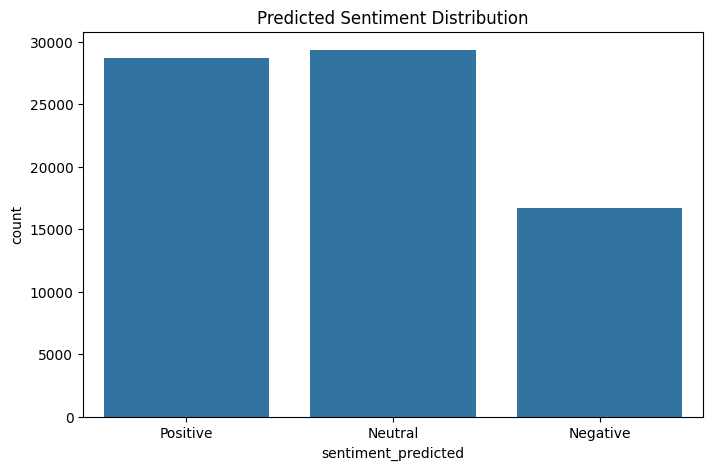

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='sentiment_predicted', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title("Predicted Sentiment Distribution")
plt.show()
